# Simple Linear Regression - Years of Experience x Salary

This example has the objective to demonstrate the use of a simple linear regression model to predict salary based on years of experience.

# Libraries

In [1]:
import pandas as pd

import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Data

In [2]:
source = 'https://raw.githubusercontent.com/LucasKiraly/Datasets/main/Salary_Data.csv'

data = pd.read_csv(source)

data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Simple linear regression model

## Defining variables

In [3]:
X = data.drop('Salary', axis=1)

y = data['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Creating model

In [4]:
simple_linear_reg = LinearRegression()

simple_linear_reg.fit(X_train, y_train)

y_pred = simple_linear_reg.predict(X_test)

## Defining linear regression equation

In [5]:
coef_a = simple_linear_reg.coef_[0]

coef_b =  simple_linear_reg.intercept_

print('\nEstimated model: y = %.2fx + %.2f' %(coef_a, coef_b))


Estimated model: y = 9351.39x + 27314.58


## Visualizing model

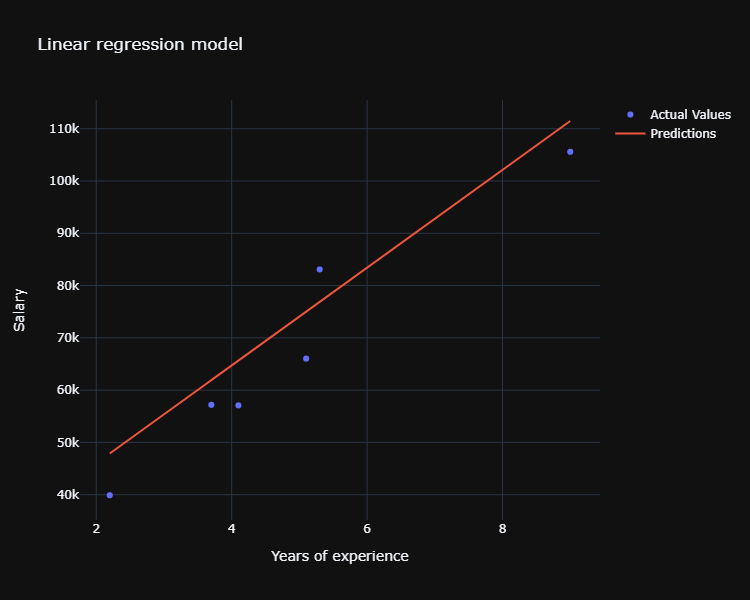

In [6]:
fig_model = go.Figure()

fig_model.add_trace(go.Scatter(x = X_test['YearsExperience'], 
                               y = y_test, 
                               mode = 'markers',
                               name = 'Actual Values'))

fig_model.add_trace(go.Scatter(x = X_test['YearsExperience'], 
                               y = y_pred, 
                               mode = 'lines',
                               name = 'Predictions'))

fig_model.update_layout(
    title_text = ('Linear regression model'),
    xaxis_title_text = 'Years of experience',
    yaxis_title_text = 'Salary', 
    template = 'plotly_dark',
)

fig_model.show('png', width = 750, height = 600)

## Evaluating model

In [7]:
mae = mean_absolute_error(y_test,y_pred)

rsq = r2_score(y_test,y_pred)

ajusted_rsq = 1 - ((1 - rsq) * (len(y_test) - 1)) / (len(y_test)- X_test.shape[1] - 1)

print('MAE: %.2f' %mae)

print('\nR²: %.2f' %rsq)

print('\nAjusted R²: %.2f' %ajusted_rsq)

MAE: 7063.39

R²: 0.88

Ajusted R²: 0.85
